<a href="https://colab.research.google.com/github/AlbertMdz/Optimizacion-Evolutiva/blob/master/MOEA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

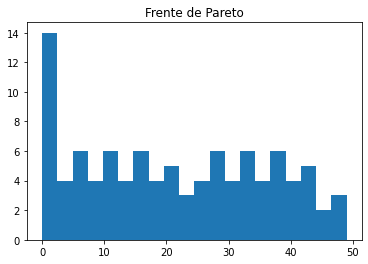

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
#valores
n_pop = 100 
n_gen = 250
genome_size = 50
Pm = 0.2 # Mutate prob
Pr = 0.5 # Reproduce 
class individual:
    def __init__(self, genome=None):
        if genome is None :
            self.genome = np.random.randint(2, size=genome_size)
        else :
            self.genome = np.array(genome)
        self.y1 = None
        self.y2 = None
        self.fitness = None
        self.pareto = None
        self.eval()
            
    def __str__(self):
        return str(self.genome)
        
    def eval(self):
        i = int(genome_size / 2)
        mul = np.array([2**-i for i in range(i)])
        x = np.sum(np.multiply(self.genome[:i], mul), axis=0)/sum(mul) 
        x = 20 * x - 10 
        self.y1 = x**2
        self.y2 = (y-2)**2
        return self

def __lt__(self, other):        
        return self.y1 < other.y1 and self.y2 < other.y2 and self != other
    
def __add__(self, other):        
        mask = np.random.randint(2, size=genome_size)
        parents = [self.genome, other.genome]
        child = individual(genome = [parents[mask[i]][i] for i in range(len(mask))])
        return child
    
def __mul__(self, other):        
        mut = np.random.choice([0, 1], size=(genome_size,), p=[1-other, other])
        self.genome = [(1-mut[i]) * self.genome[i] + mut[i] * (1-self.genome[i]) for i in range(genome_size)]
        return self
class individual:
    def __init__(self, genome=None):
        if genome is None :
            self.genome = np.random.randint(2, size=genome_size)
        else :
            self.genome = np.array(genome)
        self.y1 = None
        self.y2 = None
        self.fitness = None
        self.pareto = None
        self.eval()
            
    def __str__(self):
        return str(self.genome)
        
    def eval(self):
        mul = np.array([2**-j for j in range(len(self.genome))])
        x = np.sum(np.multiply(self.genome, mul), axis=0)/sum(mul) 
        x = 20 * x - 10 
        self.y1 = x**2
        self.y2 = (x-2)**2
        return self
    
    def __lt__(self, other):        
        return ((self.y1 <= other.y1 and self.y2 < other.y2) or (self.y1 < other.y1 and self.y2 <= other.y2)) and self != other
    
    def __add__(self, other):        
        mask = np.random.randint(2, size=genome_size)
        parents = [self.genome, other.genome]
        child = individual(genome = [parents[mask[i]][i] for i in range(len(mask))])
        return child
    
    def __mul__(self, other):        
        mut = np.random.choice([0, 1], size=(genome_size,), p=[1-other, other])
        self.genome = [(1-mut[i]) * self.genome[i] + mut[i] * (1-self.genome[i]) for i in range(genome_size)]
        return self
#  Non-Dominated Sorting
def NDS(population):   
    N = len(population)
    paretos = {}
    p = 0
    while len(population) > 0 and p <= 100:
        new_pop = []
        new_pareto = []
        for i in range(len(population)):
            find_better = [j < population[i] for j in population]
            if True in find_better :
                new_pop.append(population[i])
            else:
                population[i].pareto = int(p)
                new_pareto.append(population[i])
        for indiv in new_pareto:
            if p==0:
                indiv.fitness = 1
            else:
                indiv.fitness = len(new_pop) / N
        population = new_pop
        paretos[p] = new_pareto
        p += 1
    return np.concatenate([paretos[x] for x in paretos])

def selection(population, mu=int(n_pop * 1)):
    f = [a.fitness for a in population] 
    if np.sum(f) >0:
        f = np.cumsum(f / np.sum(f))
    new_pop = []
    for _ in range(mu):
        i = np.where(f > rd.random())[0][0] 
        new_pop.append(population[i])
    return np.array(new_pop)

def mutation(population, proba=0.01):
    for p in population:
        p = p*proba
    return population

def reproduction(population):
    children = []
    for p in population:
        r = rd.randint(0, len(population)-1)
        children.append(p + population[r])
    return np.array(children)

def generation(population, plot_graphs=True):
    population = NDS(population)
    population = selection (population)
    i_m = int(len(population) * Pm)
    i_r = int(len(population) * Pr) 
    i_s = len(population) - i_m - i_r 
    p_s = population[:i_s]
    p_m = mutation(population[i_s:(i_s+i_r)])
    p_r = reproduction(population[(i_s+i_r):])
    population = np.append(p_s, p_m)
    population = np.append(population, p_r)
    if plot_graphs: 
        plot(population)
        histo_fit(population)
    return population

population = np.array([individual() for _ in range(n_pop)])
population = NDS(population)

def histo_fit(population):
    plt.hist([a.pareto for a in population], bins=20)
    plt.title('Frente de Pareto')
    plt.show()

histo_fit(population)

def plot(pop, title=''):
    fig = plt.figure(figsize=(7, 7))
    d = np.array([[p.y1, p.y2, p.pareto] for p in pop])
    un = np.unique(d[:, 2].astype(int))
    for i in un:
        p = d[d[:, 2] == i]
        plt.scatter(p[:, 0], p[:, 1], label=i)
    
    plt.title(title)
    plt.show()

r = run()
p = r.__next__()

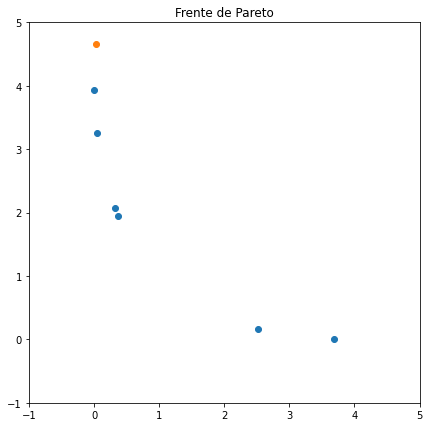

In [32]:
def run():
    population = np.array([individual() for _ in range(n_pop)])
    population = NDS(population)
    yield population
    print('Generations')
    for g in range(n_gen):
        print(str(g+1) + '/' + str(n_gen), end='\r')
        population = generation(population, plot_graphs=False)
    population = NDS(population)
    yield population

fig = plt.figure(figsize=(7, 7))
d = np.array([[a.y1, a.y2, a.pareto] for a in p])
un = np.unique(d[:, 2].astype(int))
for i in un:
    a = d[d[:, 2] == i]
    plt.scatter(a[:, 0], a[:, 1], label=i)
plt.xlim(-1, 5)
plt.ylim(-1, 5)
plt.title('Frente de Pareto')
plt.show()